<a href="https://colab.research.google.com/github/expeditive/machine-learning/blob/main/model-optimizations/precision_recall_f1_score_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection and preprocessing

In [4]:
#loading data to pandas dataframe
heart_data = pd.read_csv('/content/heart.csv')

In [5]:
#first five rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#last five rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
heart_data.shape

(1025, 14)

In [8]:
#getting info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
#checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
#stastical measures aboutrt the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#checking the distribution of the target variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


1 --> defective heart


0 --> healthy heart

##splitting the features and target

In [12]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [13]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [14]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


splitting the data into train and test

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [16]:
print(X.shape, X_train.shape,X_test.shape)


(1025, 13) (820, 13) (205, 13)


##Model Training
Logistic Regression

In [17]:
model = LogisticRegression()


In [18]:
#training the LogisticRegression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Model Evaluation

# **accuracy score**

In [19]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train )
print(training_data_accuracy)

0.8524390243902439


In [20]:
print('accuracy on training data :- ', round(training_data_accuracy*100,2),'%')

accuracy on training data :-  85.24 %


In [21]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

0.8048780487804879


In [22]:
print('accuracy on training data :- ', round(test_data_accuracy*100,2),'%')

accuracy on training data :-  80.49 %


# **confusion mtrix**

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cf_matrix=confusion_matrix(Y_test,X_test_prediction)

print(cf_matrix)

[[72 28]
 [12 93]]


In [25]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp , fn, tp)

72 28 12 93


<Axes: >

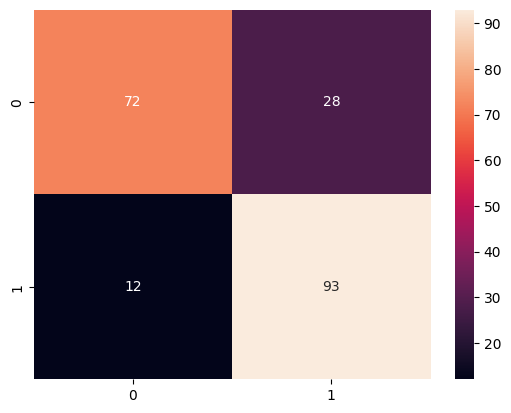

In [26]:
import seaborn as sns
sns.heatmap(cf_matrix, annot = True)

# **precision**

In **Machine Learning (ML)**, **precision** is a performance metric used primarily for **classification problems**, especially when dealing with **imbalanced datasets**.

---

### 🔍 Definition of Precision:

> **Precision** measures the **accuracy of positive predictions**. It tells us **how many of the items predicted as positive are actually positive**.

---

### 📐 Formula:

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

* **True Positives (TP)**: Correctly predicted positive cases.
* **False Positives (FP)**: Incorrectly predicted as positive (but actually negative).

---

### ✅ When to Use Precision?

Use **precision** when **false positives are more critical** than false negatives.
Examples:

* Spam email detection (you don’t want important emails marked as spam).
* Fraud detection (flagging a non-fraudulent transaction can annoy users).

---

### 📊 Example:

Suppose your model predicts 10 transactions as fraud:

* 7 were actually fraud (TP = 7)
* 3 were not fraud (FP = 3)

Then:

$$
\text{Precision} = \frac{7}{7+3} = 0.7 \text{ or } 70\%
$$

So, only 70% of your fraud alerts were correct.

---

Would you like me to explain **recall**, **F1-score**, or how to choose the best metric for your use case?


In [27]:
from sklearn.metrics import precision_score

In [33]:
#precision for training data
precision_train = precision_score(Y_train, X_train_prediction)
print('training data prediction = ', precision_train)

training data prediction =  0.8260869565217391


In [35]:
#precison for test data
precision_test = precision_score(Y_test, X_test_prediction)
print('test data prediction =', precision_test)

test data prediction = 0.768595041322314


# **Recall**

In **Machine Learning**, especially for **classification problems**, **recall** is another important metric used to evaluate model performance.

---

### 🔁 Definition of Recall:

> **Recall** measures the ability of a model to find **all relevant (positive) cases**. It tells us **how many of the actual positives your model correctly identified**.

---

### 📐 Formula:

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

* **True Positives (TP)**: Correctly predicted positive cases.
* **False Negatives (FN)**: Actual positive cases that were missed (predicted as negative).

---

### ✅ When to Use Recall?

Use **recall** when **false negatives are more dangerous** than false positives.
Examples:

* Disease diagnosis (missing a disease can be life-threatening).
* Security (failing to detect a threat is risky).

---

### 📊 Example:

Suppose there are 100 actual fraud transactions:

* Your model catches 80 of them (TP = 80)
* Misses 20 fraud cases (FN = 20)

Then:

$$
\text{Recall} = \frac{80}{80 + 20} = \frac{80}{100} = 0.8 \text{ or } 80\%
$$

So, your model caught 80% of all the real frauds.

---

### 🆚 Precision vs Recall:

* **Precision** = *How accurate are your positive predictions?*
* **Recall** = *How many actual positives did you catch?*

They often trade off against each other.

Would you like a quick overview of the **F1-score**, which balances precision and recall?


In [36]:
from sklearn.metrics import recall_score

In [37]:
#recall for training data
recall_train = recall_score(Y_train,X_train_prediction)
print('training data recall is -->', recall_train)

training data recall is --> 0.9026128266033254


In [39]:
#recall for testing data
recall_test = recall_score(Y_test,X_test_prediction)
print('test data recall is -->', recall_test)

test data recall is --> 0.8857142857142857


# **F1 score**

Great! Let's break down the **F1 score**—a key metric in Machine Learning that balances **precision** and **recall**.

---

### ⚖️ What is F1 Score?

> The **F1 score** is the **harmonic mean** of **precision** and **recall**.
> It gives a single metric that balances both **false positives** and **false negatives**.

---

### 📐 Formula:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

### 📊 Why Harmonic Mean?

* The **harmonic mean** punishes extreme values more than the average.
* So if either precision or recall is very low, the F1 score will also be low.
* This makes it useful when you need a **balanced performance**.

---

### ✅ When to Use F1 Score?

Use F1 score when:

* You care **equally** about precision and recall.
* You have an **imbalanced dataset** (e.g., fraud detection, disease classification).

It helps evaluate how well your model performs **overall** with respect to both error types.

---

### 🧮 Example:

Let’s say:

* **Precision** = 0.75
* **Recall** = 0.60

$$
\text{F1} = 2 \times \frac{0.75 \times 0.60}{0.75 + 0.60} = 2 \times \frac{0.45}{1.35} = 0.6667 \text{ or } 66.7\%
$$

---




In [40]:
from sklearn.metrics import f1_score

In [41]:
#f1 score ffor training data
f1_score_train = f1_score(Y_train,X_train_prediction)
print('training data f1 score is ', f1_score_train)

training data f1 score is  0.8626560726447219


In [42]:
#f1 score for test data
f1_score_test = f1_score(Y_test,X_test_prediction)
print('test data prediction', f1_score_test)

test data prediction 0.8230088495575221


# **precison reacall and f1 score**

In [47]:
def precision_recall_f1_score(true_label, predicted_label):

  precision__score = precision_score(true_label,predicted_label)

  recall__score = recall_score(true_label,predicted_label)

  f1__score = f1_score(true_label,predicted_label)


  print("precision -->", precision__score)
  print('recall -->',recall__score)
  print('f1 score-->',f1__score)


In [51]:
#for train data
precision_recall_f1_score(Y_train,X_train_prediction)

precision --> 0.8260869565217391
recall --> 0.9026128266033254
f1 score--> 0.8626560726447219


In [52]:
#for test data
precision_recall_f1_score(Y_test,X_test_prediction)

precision --> 0.768595041322314
recall --> 0.8857142857142857
f1 score--> 0.8230088495575221
